In [1]:
import numpy as np
from numpy.linalg import inv, pinv, norm, cond
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [53]:
n = 100
k = 10
lamda = 0.01
scale = 1
title_str = f'foward_error_n={n}_k={k}_lambda={lamda}_normal'
rand_seed = 1
np.random.seed(rand_seed)
A = np.random.normal(size=(n,n),scale= scale)
U = np.random.normal(size=(n,k))
U *= np.sqrt(lamda)/norm(U, ord=2)
V = np.random.normal(size=(n,k))
V *= np.sqrt(lamda)/norm(V, ord=2)
B = A + U@V.T
A_inv = inv(A)
B_inv = inv(B)
A_inv_norm = norm(A_inv,ord=2)
Z_norm = norm(inv(np.eye(k)+V.T@A_inv@U),ord=2)
e1s = np.array([0]+list(np.logspace(-6,3,40)))
e2s = np.array([0]+list(np.logspace(-6,3,40)))


In [24]:
errors[0,0],bounds[0,0]

(767.7371542154577, 0.0)

In [38]:
e1 = 0
e2 = 0.0001

In [39]:
noise1 = np.random.normal(size=(n,n))
noise1 *= e1/norm(noise1,ord=2)
noise2 = np.random.normal(size=(k,k))
noise2 *= e2/norm(noise2,ord=2)
A_til_inv = A_inv + noise1
Z_inv = inv(np.eye(k)+V.T@A_til_inv@U) + noise2


In [40]:
B_inv_approx = A_til_inv - A_til_inv@U@Z_inv@V.T@A_til_inv

In [41]:
B_inv

array([[-26.01991693,  12.80868235, -12.89875509, ...,   1.71563905,
        -15.2767128 ,  -2.78049413],
       [  9.07403147,  -4.65215407,   4.63807341, ...,  -0.62017624,
          5.2703385 ,   0.99816917],
       [-12.80350397,   6.37034253,  -6.35807823, ...,   0.84529775,
         -7.38866204,  -1.41679219],
       ...,
       [  0.13676348,  -0.50890567,   0.30582215, ...,  -0.08036353,
         -0.12107108,   0.14818136],
       [-19.03747511,   9.88406086,  -9.74536382, ...,   1.2533936 ,
        -10.95275113,  -2.18296261],
       [-16.76019422,   8.49212808,  -8.39307065, ...,   1.02019971,
         -9.57323579,  -1.86760659]])

In [42]:
A_inv - A_inv@U@inv(np.eye(k)+V.T@A_inv@U)@V.T@A_inv

array([[-1.20986157, -0.09997927, -0.28692648, ...,  0.11223434,
        -1.00566262,  0.01682431],
       [ 0.31264452, -0.06217744,  0.16695897, ..., -0.04818146,
         0.24883737, -0.00386889],
       [-0.58056553,  0.0634663 , -0.17229813, ...,  0.06105435,
        -0.35053783, -0.04908618],
       ...,
       [-0.20506691, -0.2787402 ,  0.1055979 , ..., -0.04914169,
        -0.27835437,  0.07979301],
       [-0.66112892,  0.27472561, -0.3789158 , ...,  0.05798145,
        -0.42531507, -0.08124755],
       [-0.79760823,  0.20741901, -0.28485369, ..., -0.01312628,
        -0.38405963, -0.07064772]])

In [44]:
B_inv_approx

array([[-1.24424976, -0.08127028, -0.30482621, ...,  0.11453096,
        -1.02513346,  0.01273716],
       [ 0.32464237, -0.06870345,  0.1732031 , ..., -0.04898242,
         0.25563094, -0.00244345],
       [-0.59758301,  0.07272263, -0.18115513, ...,  0.06219074,
        -0.36017364, -0.05110842],
       ...,
       [-0.20475691, -0.27890282,  0.10575576, ..., -0.04916151,
        -0.2781773 ,  0.07982803],
       [-0.68643001,  0.28848389, -0.39208168, ...,  0.05967036,
        -0.43964239, -0.08425281],
       [-0.81972702,  0.2194507 , -0.2963658 , ..., -0.01164931,
        -0.39658393, -0.07327616]])

In [ ]:

B_inv_approx = A_til_inv - A_til_inv@U@Z_inv@V.T@A_til_inv
error = norm(B_inv-B_inv_approx,ord=2)
# bound = e1*((A_inv_norm*lamda)**2+(1+A_inv_norm*lamda)**2)
B_inv_A_norm = norm(B_inv@A,ord=2)
# print('B_inv_A_norm = %f'%B_inv_A_norm)
full_bound = e1 + ((A_inv_norm + e1)**2)*lamda*(e2+2*lamda*(cond(V)**2)*B_inv_A_norm**2*e1)+(2*A_inv_norm+e1)*lamda*B_inv_A_norm*e1


In [46]:
def compute_SMW(n,k,A,B,A_inv,B_inv,A_inv_norm,U,V,lamda,e1,e2,rand_seed=1):
    np.random.seed(rand_seed)    
    noise1 = np.random.normal(size=(n,n))
    noise1 *= e1/norm(noise1,ord=2)
    noise2 = np.random.normal(size=(k,k))
    noise2 *= e2/norm(noise2,ord=2)

    A_til_inv = A_inv + noise1
    Z_inv = inv(np.eye(k)+V.T@A_til_inv@U) + noise2
    B_inv_approx = A_til_inv - A_til_inv@U@Z_inv@V.T@A_til_inv
    error = norm(B_inv-B_inv_approx,ord=2)
    # bound = e1*((A_inv_norm*lamda)**2+(1+A_inv_norm*lamda)**2)
    B_inv_A_norm = norm(B_inv@A,ord=2)
    # print('B_inv_A_norm = %f'%B_inv_A_norm)
    full_bound = e1 + ((A_inv_norm + e1)**2)*lamda*(e2+2*lamda*(cond(V)**2)*B_inv_A_norm**2*e1)+(2*A_inv_norm+e1)*lamda*B_inv_A_norm*e1
    return error,full_bound


In [54]:
errors = np.zeros((len(e1s),len(e2s)))
bounds = np.zeros((len(e1s),len(e2s)))
for i,e1 in enumerate(e1s):
    for j,e2 in enumerate(e2s):
        errors[i,j],bounds[i,j] = compute_SMW(n,k,A,B,A_inv,B_inv,A_inv_norm,U,V,lamda,e1,e2)
    print(i," done")

0  done
1  done
2  done
3  done
4  done
5  done
6  done
7  done
8  done
9  done
10  done
11  done
12  done
13  done
14  done
15  done
16  done
17  done
18  done
19  done
20  done
21  done
22  done
23  done
24  done
25  done
26  done
27  done
28  done
29  done
30  done
31  done
32  done
33  done
34  done
35  done
36  done
37  done
38  done
39  done
40  done


In [22]:
errors[0,0]

767.7371542154577

In [23]:
bounds[0,0]

0.0

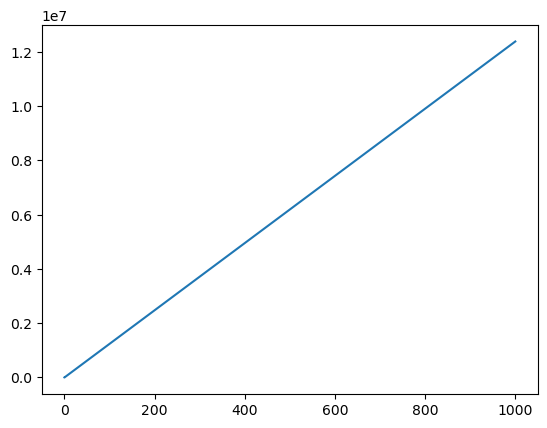

In [21]:
plt.plot(e2s,errors[0,:],label = )

In [57]:
e1_used = []
e2_used = []
for i in range(len(e1s)):
    for j in range(len(e2s)):
        e1_used.append(e1s[i])
        e2_used.append(e2s[j])

C:\Users\25016\AppData\Local\Temp\ipykernel_25636\199341178.py:4: RuntimeWarning: divide by zero encountered in log10
  E1,E2 = np.meshgrid(np.log10(e1s/A_inv_norm),np.log10(e2s/Z_norm))
C:\Users\25016\AppData\Local\Temp\ipykernel_25636\199341178.py:6: RuntimeWarning: divide by zero encountered in log10
  Bounds = np.log10(bounds.T)
C:\Users\25016\AppData\Local\Temp\ipykernel_25636\199341178.py:26: RuntimeWarning: divide by zero encountered in log10
  y_range = np.linspace(np.min(np.log10(e2_used)), np.max(np.log10(e2_used)), 100)


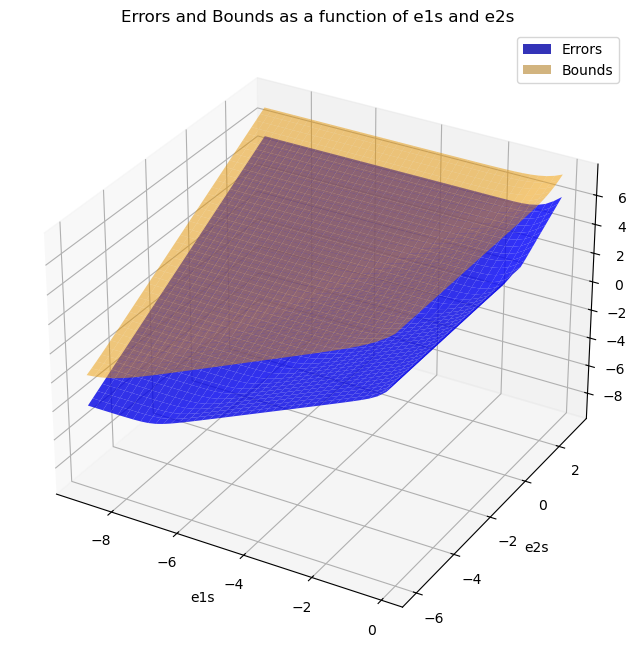

In [61]:
# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
E1,E2 = np.meshgrid(np.log10(e1s/A_inv_norm),np.log10(e2s/Z_norm))
Errors = np.log10(errors.T)
Bounds = np.log10(bounds.T)

# Plot the surfaces with different colormaps
surface1 = ax.plot_surface(E1, E2, Errors, color ='blue', alpha=0.8,label='Errors')
surface2 = ax.plot_surface(E1, E2, Bounds, color = 'orange', alpha=0.5,label='Bounds')

# ax.scatter(np.log10(e1_used/A_inv_norm), np.log10(e2_used/Z_norm), np.log10(errors.flatten()), s=10, label='errors')
# ax.scatter(np.log10(e1_used/A_inv_norm), np.log10(e2_used/Z_norm), np.log10(bounds.flatten()), s=10, label='bounds')


# Customize the plot
ax.set_xlabel('e1s')
ax.set_ylabel('e2s')
ax.set_zlabel('Values')
ax.set_title('Errors and Bounds as a function of e1s and e2s')
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_zscale('log')
# Define the surface at x = 1e-5
x_value = np.log10(1/2/lamda/np.linalg.cond(V)/norm(inv(B)@A,ord=2)/A_inv_norm)
y_range = np.linspace(np.min(np.log10(e2_used)), np.max(np.log10(e2_used)), 100)
z_range = np.linspace(np.min(np.log10(errors.flatten())), np.max(np.log10(errors.flatten())), 100)
Y, Z = np.meshgrid(y_range, z_range)
X = np.full_like(Y, x_value)

# Plot the surface
ax.plot_surface(X, Y, Z, color='red', alpha=0.3)

# Add a color bar for each surface
# fig.colorbar(surface1, ax=ax, shrink=0.5, aspect=5, label='Errors')
# fig.colorbar(surface2, ax=ax, shrink=0.5, aspect=5, label='Bounds')

# Show plot
plt.legend()
plt.show()

